In [1]:
#First all relevant imports
from tensorflow.keras import layers
from tensorflow.keras import models
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix


In [32]:
#Attempt to predict one image, while uploading the newly formed dataset
dataset = pd.read_csv("C:\\Users\\20183382\\Desktop\\CNN\\CNN-letter-classification\\ML-Back-End\\clean.csv",header=None).astype('float32')

# Splite data the X - Our data , and y - the prdict label
X = dataset


In [33]:
print('data shape:', X.shape)
print('collumns:',len(X.iloc[1]))

X.head()

data shape: (6, 784)
collumns: 784


,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


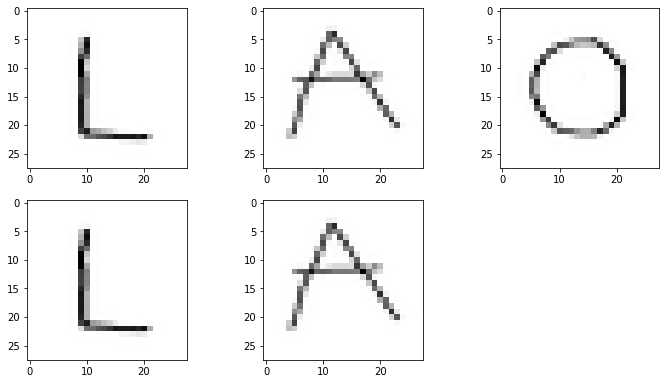

In [35]:
from sklearn.utils import shuffle

#X_shuffle = shuffle(X)

plt.figure(figsize = (12,10))
row, colums = 3, 3
for i in range(5):  
    plt.subplot(colums, row, i+1)
    plt.imshow(X.iloc[i].values.reshape(28,28),interpolation='nearest', cmap='Greys')
plt.show()

In [9]:
from tensorflow import keras
model = keras.models.load_model('C:\\Users\\20183382\\Desktop\\CNN\\CNN-letter-classification\\ML-Back-End\\cnn_model.h5')

In [36]:
standard_scaler = MinMaxScaler()
standard_scaler.fit(X)



X_train = standard_scaler.transform(X)
print(X_train)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [37]:
#transforming the X class
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')


print(X_train)

[[[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]]


 [[[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  ...

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.]
   [0.]
   [0.]
   ...
   [0.]
   [0.]
   [0.]]

  [[0.

In [ ]:
#Hardcoding the true labels just to make it easy.
# x=['a','a','b','c','c','c']
# >>> map(x.count,x)
# [2, 2, 1, 3, 3, 3]
# >>> dict(zip(x,map(x.count,x)))
# {'a': 2, 'c': 3, 'b': 1}

In [38]:


y_test = model.predict(X_train) 
y_classes = (model.predict(X_train) > 0.5).astype("int32")
print(y_test)
print(y_classes)

[[2.9803358e-24 1.0204729e-13 4.9090541e-11 9.0467451e-12 3.5282885e-10
  7.7374081e-28 3.2027109e-14 2.3100059e-21 1.0533296e-14 3.4242093e-19
  3.7522225e-09 9.9999952e-01 9.5209613e-26 3.3908228e-15 7.8026480e-20
  1.9852837e-19 7.7955164e-18 6.9734080e-11 4.2949720e-18 2.8467868e-24
  1.3939374e-14 1.4601247e-20 4.7583492e-13 8.1222988e-12 2.5983874e-22
  4.8686326e-07]
 [9.9999928e-01 4.0390632e-11 1.5664324e-18 1.2998830e-24 9.5743860e-19
  6.8591128e-23 7.1436836e-21 4.4685218e-16 4.7306277e-29 2.2360212e-23
  3.1244271e-15 5.5824247e-29 6.0120793e-12 7.6916690e-22 2.2421584e-19
  1.0722769e-17 9.0363356e-25 6.6704638e-07 8.4904437e-24 1.8914162e-20
  4.3033152e-27 1.1997406e-30 1.1787511e-36 1.7432271e-18 6.1487143e-27
  2.5620433e-18]
 [1.1677722e-14 6.7302044e-03 1.5288314e-02 6.1239664e-02 2.0333780e-05
  2.2611641e-14 3.7631637e-04 9.0783422e-12 1.7811917e-07 8.8943052e-05
  2.5583637e-09 1.5531679e-13 3.9668987e-11 2.3685384e-03 8.5207844e-01
  1.0885871e-05 4.8763614e-02 

In [70]:
#Small script to convert prediction to a letter, and hence we can feedforward this to the model.


#print(len(y_classes))
y_conver = y_classes[0:1]
#print(y_conver)
#flattening the array to get a one dimensional array.
test_list = y_conver.flatten()
print(test_list)

print(len(y_map), len(test_list))
test_list.astype("int")
y_map = ['A','B','C', 'D', 'E','F','G','H','I','J','K', 'L', 'M', 'N', 'O','P', 'Q', 'R', 'S',
 'T', 'U', 'V','W','X', 'Y','Z']

# to convert lists to dictionary
y_dict = {y_map[i]: test_list[i] for i in range(len(y_map))}
print(y_dict)



[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
26 26
{'A': 0, 'B': 0, 'C': 0, 'D': 0, 'E': 0, 'F': 0, 'G': 0, 'H': 0, 'I': 0, 'J': 0, 'K': 0, 'L': 1, 'M': 0, 'N': 0, 'O': 0, 'P': 0, 'Q': 0, 'R': 0, 'S': 0, 'T': 0, 'U': 0, 'V': 0, 'W': 0, 'X': 0, 'Y': 0, 'Z': 0}
